In [209]:
import pandas as pd
import numpy as np
import scipy, scipy.stats

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# from mpl_toolkits.mplot3d import Axes3D

#from basis_expansions.basis_expansions import Polynomial, LinearSpline

# from regression_tools.dftransformers import (
#     ColumnSelector, Identity, FeatureUnion, MapFeature, Intercept)

# from regression_tools.plotting_tools import (
#     plot_univariate_smooth, bootstrap_train, display_coef, 
#     plot_bootstrap_coefs, plot_partial_depenence, 
#     plot_partial_dependences, predicteds_vs_actuals)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [210]:
def round_to_3(x):
    return round(x,3)

In [211]:
cdf = pd.read_csv('ddf_final_without_scores.csv')
numeric_predictors = ['elo', 'opp_elo', 'diff', 'color',
                      'game_time', 'start_time', 'weekday', 'day']
X = np.array(cdf['diff'])
y = cdf['result']

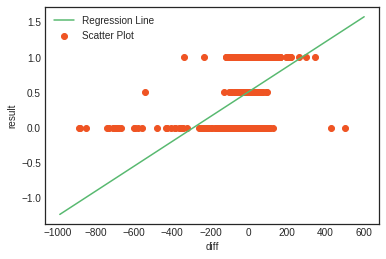

In [56]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
Y = b0 + b1 * x

# Ploting Line
plt.plot(x, Y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, c='#ef5423', label='Scatter Plot')

plt.xlabel('diff')
plt.ylabel('result')
plt.legend()
plt.show()

In [57]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, y)
# Y Prediction
y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, y)

print(np.sqrt(mse))
print(r2_score)

0.45500994614637413
0.1201395297272463


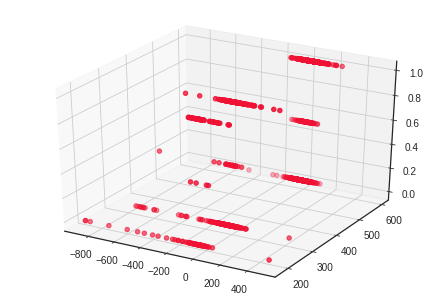

In [58]:
elo = cdf['elo'].values
opp_elo = cdf['opp_elo'].values
diff = cdf['diff'].values
color_ = cdf['color'].values
start_time = cdf['start_time'].values
game_time = cdf['game_time'].values
weekday = cdf['weekday'].values
day = cdf['day'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(diff, game_time, y, color='#ef1234')
plt.show()

In [59]:
# X and Y Values
X = np.array([elo, opp_elo, diff, color_, game_time,
              start_time, weekday, day]).T

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, y)
# Y Prediction
y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = reg.score(X, y)

print(rmse)
print(r2)

0.4527641538990628
0.12880354865086607


In [60]:
m = len(elo)
x0 = np.ones(m)
X = np.array([x0, elo, opp_elo, diff, color_,
              game_time, start_time, weekday, day]).T
# Initial Coefficients
b = np.array([0, 0, 0])
alpha = 0.0001

In [204]:
# X and Y Values
X = np.array([elo, opp_elo, diff**3, color_,
              game_time**3, start_time**3, weekday, day]).T

# Model Intialization
reg = LinearRegression(normalize=True, n_jobs=-1)
# Data Fitting
reg = reg.fit(X, y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = reg.score(X, y)

print(rmse)
print(r2)
# ylog

0.4527641538990628
0.18737557683554118


In [ ]:
# weekday_fit = Pipeline([('weekday', ColumnSelector(name='weekday')), (
#     'weekday_spline', LinearSpline(knots=[0, 1, 2, 3, 4, 5, 6]))])
# game_time_fit = Pipeline([('game_time', ColumnSelector(name='game_time')), (
#     'game_time_spline', LinearSpline(knots=[150, 300, 450, 600]))])
# color_fit = Pipeline([('color', ColumnSelector(name='color')), (
#     'color_spline', LinearSpline(knots=[1]))])
# elo_fit = Pipeline([('elo', ColumnSelector(name='elo')), (
#     'elo_spline', LinearSpline(knots=[600, 700, 800, 900, 1000]))])
# diff_fit = Pipeline([('diff', ColumnSelector(name='diff')), (
#     'diff_spline', LinearSpline(knots=[-500, -100, -50, -20, -10, -5, 0, 0, 5, 10, 20, 50, 100, 500]))])
# opp_elo_fit = Pipeline([('opp_elo', ColumnSelector(name='opp_elo')), (
#     'opp_elo_spline', LinearSpline(knots=[600, 700, 800, 900, 1000, 1100, 1300, 1800]))])
# day_fit = Pipeline([('day', ColumnSelector(name='day')), (
#     'day_spline', LinearSpline(knots=[5, 10, 15, 20, 25, 30]))])
# start_time_fit = Pipeline([('start_time', ColumnSelector(name='start_time')), (
#     'start_time_spline', LinearSpline(knots=[0, 8000, 12000, 16000, 18000, 20000, 23999]))])

In [ ]:
# result_pipeline = FeatureUnion([
#     ('intercept', Intercept()), ('diff_fit', diff_fit),
#     ('elo_fit', elo_fit), ('opp_elo_fit', opp_elo_fit),
#     ('color_fit', color_fit), ('game_time_fit', game_time_fit),
#     ('start_time_fit', start_time_fit), ('weekday_fit', weekday_fit),
#     ('day_fit', day_fit)])
# result_pipeline.fit(X)
# result_features = result_pipeline.transform(X)
# result_model = LinearRegression(fit_intercept=False)
# result_model.fit(result_features.values, y.values)

In [ ]:
# bootstrap_models = bootstrap_train(
#     LinearRegression, result_features.values,
#     y.values, fit_intercept=False, bootstraps=10000)

In [ ]:
# diff_spec = ColumnSelector(name="diff")
# color_spec = ColumnSelector(name="color")
# game_spec = ColumnSelector(name="game_time")
# st_spec = ColumnSelector(name="start_time")
# wd_spec = ColumnSelector(name="weekday")


# balanced_pipeline = FeatureUnion([
#     ('intercept', Intercept()), ('diff_fit', diff_spec),
#     ('color_fit', color_spec), ('game_time_fit', game_spec),
#     ('start_time_fit', st_spec), ('weekday_fit', wd_spec)])
# balanced_pipeline = FeatureUnion([
#     ('intercept', Intercept()), ('diff_fit', diff_spec),
#     ('color_fit', color_spec), ('start_time_fit', st_spec)])
# balanced_pipeline.fit(X)
# balanced_features = balanced_pipeline.transform(X)
# balanced_features.head()

In [ ]:
# balanced_model = LinearRegression(fit_intercept=False)
# balanced_model.fit(balanced_features, y)

In [ ]:
# balanced_bootstrap = bootstrap_train(
#     LinearRegression, balanced_features.values,
#     y.values, fit_intercept=False, bootstraps=10000)

In [ ]:
# y_hat = balanced_model.predict(balanced_features.values)

In [ ]:
# def rss(y, y_hat):
#     return np.sum((y - y_hat)**2)

In [ ]:
# print("RSS: {}".format(rss(y, y_hat)))

In [ ]:
# def rsq(y, y_hat):
#     ss_tot = rss(y, np.mean(y))
#     ss_res = rss(y, y_hat)
#     return 1 - (ss_res / ss_tot)

In [ ]:
# print("R^2: {}".format(rsq(y, y_hat)))

In [ ]:
# def bootstrap_rsq(X, y, pipeline, n_boot=10000):
#     rsqs = []
#     for _ in range(n_boot):
#         X_boot, y_boot = resample(X, y)
#         X_transform = pipeline.transform(X_boot)
#         model = LinearRegression(fit_intercept=False)
#         model.fit(X_transform.values, y_boot)
#         y_boot_hat = model.predict(X_transform.values)
#         rsqs.append(rsq(y_boot, y_boot_hat))
#     return rsqs

In [ ]:
# rsqs = bootstrap_rsq(X, y, balanced_pipeline)

In [ ]:
# def plot_many_residuals(var_names, y_hat, n_bins=50):
#     fig, axs = plt.subplots(len(var_names), figsize=(12, 3*len(var_names)))
#     for ax, name in zip(axs, var_names):
#         x = cdf[name]
#         residual_plot(ax, x, y, y_hat)
#         ax.set_xlabel(name)
#         ax.set_title("Model Residuals by {}".format(name))
#     return fig, axs

In [ ]:
# def residual_plot(ax, x, y, y_hat, n_bins=50):
#     residuals = y - y_hat
#     ax.axhline(0, color="black", linestyle="--")
#     ax.scatter(x, residuals, color="grey", alpha=0.5)
#     ax.set_ylabel("Residuals ($y - \hat y$)")

In [ ]:
# weekday_fit.transform(cdf)
# game_time_fit.transform(cdf)
# color_fit.transform(cdf)
# elo_fit.transform(cdf)
# diff_fit.transform(cdf)
# opp_elo_fit.transform(cdf)
# day_fit.transform(cdf)
# start_time_fit.transform(cdf)
# print('hello')

In [ ]:
# def plot_basis(axs, basis_expansion, t):
#     basis = basis_expansion.fit_transform(t)
#     for idx, ax in enumerate(axs.flatten()):
#         ax.plot(t, basis[:, idx])

In [ ]:
# def plot_one_univariate(ax, var_name, mask=None, bootstrap=100):
#     if mask is None:
#         plot_univariate_smooth(ax, cdf[var_name].values.reshape(-1, 1),
#                                cdf['result'], bootstrap=bootstrap)
#     else:
#         plot_univariate_smooth(ax, cdf[var_name].values.reshape(-1, 1),
#                                cdf['result'], mask=mask, bootstrap=bootstrap)

In [ ]:
# def plot_many_predicteds_vs_actuals(var_names, y_hat, n_bins=50):
#     fig, axs = plt.subplots(len(var_names), figsize=(12, 3*len(var_names)))
#     for ax, name in zip(axs, var_names):
#         x = cdf[name]
#         predicteds_vs_actuals(ax, x, cdf["result"], y_hat, n_bins=n_bins)
#         ax.set_title("{} Predicteds vs. Actuals".format(name))
#     return fig, axs

In [ ]:
# def residual_plot(ax, x, y, y_hat, n_bins=50):
#     residuals = y - y_hat
#     ax.axhline(0, color="black", linestyle="--")
#     ax.scatter(x, residuals, color="grey", alpha=0.5)
#     ax.set_ylabel("Residuals ($y - \hat y$)")
# fig, ax = plt.subplots(figsize=(12, 3))
# residual_plot(ax, y_hat, cdf["result"], y_hat)
# ax.set_title("Residuals by Predicted Values")
# ax.set_xlabel("$\hat y$")
# plt.show()